In [1]:
# from preprocessing import preprocess_parquet_table
# import pyarrow.parquet as parquet
# preprocess_parquet_table('./data/collabTrain','./train_preprocessed',\
#                          cols=parquet.read_table(input_path + '/collabTrain/date=2018-02-07').to_pandas().columns)

# preprocess_parquet_table('./data/collabTest','./test_preprocessed',\
#                          cols=parquet.read_table(input_path + '/collabTest').to_pandas().columns,\
#                          params_path='./train_preprocessed')
# from data_iter import DataIter
# import mxnet as mx
# remove_features =['instanceId_objectId','instanceId_userId','feedback']
# data_names=[i[:-4] for i in os.listdir('./data_preprocessed') if i.endswith('.npy') and not  (i[:-4] in remove_features)]
# label_names=['feedback']
# print(len(data_names))
# data_iter = DataIter('./data_preprocessed',100,data_names=data_names,label_names=label_names,shuffle=True)
# train = data_iter.inx[1000000:]
# val = data_iter.inx[:1000000]
# for k,v in data_iter.data.items():
#     np.save('val_preprocessed/%s.npy'%k,v[val])
#     np.save('train_preprocessed/%s.npy'%k,v[train])

In [2]:
# import numpy as np
# import pickle
# def make_like_feature(path):
#     data = np.load(path+'/feedback.npy')
#     params = pickle.load(open(path+'/feedback.pkl','rb'))
#     inx = list(params['unames']).index('Liked')
#     data = data[:,[inx]]
#     pickle.dump({'type':'categorical','unames':['NonLiked','Liked']},open(path+'/liked.pkl','wb'))
#     np.save(path+'/liked.npy',data.astype(np.uint8))
    
# make_like_feature('./train_preprocessed')

In [3]:
from data_iter import DataIter
import mxnet as mx

In [4]:
ctx=[mx.gpu(0),mx.gpu(1)]
num_epoch=100
exp_dir='exps'
load_epoch=3
name='binary'
batch_size=512

In [5]:
import os
remove_features = ['instanceId_objectId','instanceId_userId','feedback','liked']
data_names=[i[:-4] for i in os.listdir('./train_preprocessed') if i.endswith('.npy') and not  (i[:-4] in remove_features)]
label_names=['liked']
print(len(data_names))

107


In [6]:
train_iter = DataIter('./train_preprocessed',batch_size,data_names=data_names,label_names=label_names,shuffle=True,usampling=True)
val_iter = DataIter('./val_preprocessed',batch_size,data_names=data_names,label_names=label_names,shuffle=False,max_len=batch_size*1000)
test_iter = DataIter('./test_preprocessed',batch_size,data_names=data_names,label_names=[],shuffle=False)

In [7]:
from model import make_network,add_loss
sym = make_network(train_iter)
sym = add_loss(sym)

In [8]:
mx.viz.print_summary(sym,dict(train_iter.provide_data))

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE(nu1                       0                                           
________________________________________________________________________________________________________________________
userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE_em1x16                    0           userOwnerCounters_USER_PHOTO_ALB
________________________________________________________________________________________________________________________
reshape0(Reshape)                                   16                      0           userOwnerCounters_USER_PHOTO_ALB
________________________________________________________________________________________________________________________
split0(SliceChannel)            

In [10]:
from train import train

model = train(sym,train_iter,val_iter,
      name=name,
      load_epoch=load_epoch,
      batch_size=batch_size,
      exp_dir=exp_dir)

2019-03-04 17:43:28,728 Adjust learning rate to 6.400000e-02 for epoch 3


Saving with prefix: exps/binary/snapshots/binary
exps/binary/train.log


2019-03-04 17:43:58,111 Epoch[3] Batch [0-500]	Speed: 9847.68 samples/sec	accuracy=0.698642
2019-03-04 17:44:24,079 Epoch[3] Batch [500-1000]	Speed: 9859.18 samples/sec	accuracy=0.701348
2019-03-04 17:44:50,063 Epoch[3] Batch [1000-1500]	Speed: 9852.65 samples/sec	accuracy=0.704594
2019-03-04 17:45:16,121 Epoch[3] Batch [1500-2000]	Speed: 9824.76 samples/sec	accuracy=0.704891
2019-03-04 17:45:42,172 Epoch[3] Batch [2000-2500]	Speed: 9827.27 samples/sec	accuracy=0.705695
2019-03-04 17:46:08,227 Epoch[3] Batch [2500-3000]	Speed: 9825.74 samples/sec	accuracy=0.705449
2019-03-04 17:46:34,368 Epoch[3] Batch [3000-3500]	Speed: 9793.40 samples/sec	accuracy=0.704762
2019-03-04 17:47:00,448 Epoch[3] Batch [3500-4000]	Speed: 9816.34 samples/sec	accuracy=0.704590
2019-03-04 17:47:26,635 Epoch[3] Batch [4000-4500]	Speed: 9776.25 samples/sec	accuracy=0.704930
2019-03-04 17:47:52,918 Epoch[3] Batch [4500-5000]	Speed: 9741.20 samples/sec	accuracy=0.705527
2019-03-04 17:48:19,153 Epoch[3] Batch [5000-

2019-03-04 18:20:20,694 Epoch[6] Batch [4500-5000]	Speed: 9675.71 samples/sec	accuracy=0.707074
2019-03-04 18:20:47,116 Epoch[6] Batch [5000-5500]	Speed: 9690.46 samples/sec	accuracy=0.706812
2019-03-04 18:21:13,562 Epoch[6] Batch [5500-6000]	Speed: 9680.28 samples/sec	accuracy=0.706629
2019-03-04 18:21:39,964 Epoch[6] Batch [6000-6500]	Speed: 9697.98 samples/sec	accuracy=0.706336
2019-03-04 18:22:06,386 Epoch[6] Batch [6500-7000]	Speed: 9689.05 samples/sec	accuracy=0.705793
2019-03-04 18:22:32,760 Epoch[6] Batch [7000-7500]	Speed: 9706.95 samples/sec	accuracy=0.706133
2019-03-04 18:22:59,171 Epoch[6] Batch [7500-8000]	Speed: 9695.20 samples/sec	accuracy=0.708449
2019-03-04 18:23:25,579 Epoch[6] Batch [8000-8500]	Speed: 9694.85 samples/sec	accuracy=0.705996
2019-03-04 18:23:51,976 Epoch[6] Batch [8500-9000]	Speed: 9700.18 samples/sec	accuracy=0.706012
2019-03-04 18:24:18,378 Epoch[6] Batch [9000-9500]	Speed: 9696.71 samples/sec	accuracy=0.708258
2019-03-04 18:24:44,789 Epoch[6] Batch [

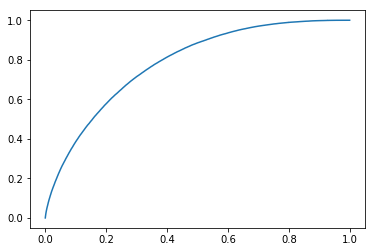

In [35]:
from test import predict,score,make_submission
%matplotlib inline
score(val_iter,7,name)
prediction = predict(test_iter,7,name)    
make_submission(prediction,name)